# Análise de dados com Pandas/Visualização com Matplotlib 

## Pandas

In [1]:
import pandas as pd

In [2]:
"""1. Limpe os dados: substitua cada valor “?” e “n.a” por NaN. 
   (explore o atributo na_values, da função read_csv). """

df = pd.read_csv("dataAuto.csv", header= 0, na_values = ['n.a','?'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
company             61 non-null object
body-style          61 non-null object
wheel-base          59 non-null float64
length              60 non-null float64
engine-type         61 non-null object
num-of-cylinders    61 non-null object
horsepower          60 non-null float64
average-mileage     59 non-null float64
price               58 non-null float64
dtypes: float64(5), object(4)
memory usage: 4.4+ KB


In [4]:
df["wheel-base"] = df["wheel-base"].astype("float")
df["length"] = df["length"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["average-mileage"] = df["average-mileage"].astype("float")
df["price"] = df["price"].astype("float")

In [5]:
# 2. Mostre os 3 primeiros e últimos registos (linhas) do dataset
df.head(3)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,alfa-romero,convertible,88.6,168.8,dohc,four,111.0,21.0,13495.0
1,alfa-romero,convertible,88.6,168.8,dohc,four,111.0,21.0,16500.0
2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154.0,19.0,16500.0


In [6]:
df.tail()

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,volkswagen,sedan,97.3,171.7,ohc,four,85.0,27.0,7975.0
57,volkswagen,sedan,97.3,171.7,ohc,four,52.0,37.0,7995.0
58,volkswagen,sedan,97.3,171.7,ohc,four,100.0,26.0,9995.0
59,volvo,sedan,104.3,188.8,ohc,four,114.0,23.0,12940.0
60,volvo,wagon,104.3,188.8,ohc,four,114.0,23.0,13415.0


In [7]:
# 2.1 Guarde com outro nome num ficheiro CSV. 
df.to_csv('dataAuto_clean.csv')

In [22]:
"""3. Extraia para um novo dataframe apenas as colunas body-style 
    e horsepower dos registos 10 a 19."""

new_df = ['body-style','horsepower']
df[10:20][new_df]

,body-style,horsepower
10,sedan,182
11,sedan,182
12,sedan,182
13,hatchback,48
14,hatchback,70
15,sedan,70
16,hatchback,68
17,hatchback,68
18,wagon,76
19,sedan,101


In [28]:
# 4. Descubra o preço máximo, mínimo e médio dos automóveis listados. 
print('O preço mais alto é :',df['price'].max())

O preço mais alto é : 45400.0


In [29]:
print('O preço mais baixo é:',df['price'].min())

O preço mais baixo é: 5151.0


In [30]:
print('A media dos preços é:',df['price'].mean())

A media dos preços é: 15387.0


In [31]:
# 5. Mostre a marca e preço do automóvel mais caro. 
maximo= df[['company','price']][df['price']==df['price'].max()]
maximo

,company,price
35,mercedes-benz,45400.0


In [32]:
# 6. Mostre todos os dados dos automóveis da marca “Toyota”
#    (explore o groupby/get_group). 

Marca= df.groupby(['company'])
Marca.get_group('toyota')

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
48,toyota,hatchback,95.7,158.7,ohc,four,62,35,5348.0
49,toyota,hatchback,95.7,158.7,ohc,four,62,31,6338.0
50,toyota,hatchback,95.7,158.7,ohc,four,62,NaN,6488.0
51,toyota,wagon,95.7,169.7,ohc,four,62,31,6918.0
52,toyota,wagon,95.7,169.7,ohc,four,62,27,7898.0
53,toyota,wagon,95.7,169.7,ohc,four,62,27,8778.0
54,toyota,wagon,104.5,187.8,dohc,six,156,19,15750.0


In [33]:
# 7. Mostre quantos automóveis de cada marca existem no dataset. 
Marca.size()

company
alfa-romero      3
audi             4
bmw              6
chevrolet        3
dodge            2
honda            3
isuzu            3
jaguar           3
mazda            5
mercedes-benz    4
mitsubishi       4
nissan           5
porsche          3
toyota           7
volkswagen       4
volvo            2
dtype: int64

In [34]:
# 8. Mostre o modelo e preço do carro mais caro de cada marca. 
df.groupby('company')['body-style', 'price'].max()

,body-style,price
company,,
alfa-romero,hatchback,16500.0
audi,wagon,18920.0
bmw,sedan,41315.0
chevrolet,sedan,6575.0
dodge,hatchback,6377.0
honda,wagon,12945.0
isuzu,sedan,6785.0
jaguar,sedan,36000.0
mazda,sedan,18344.0


In [44]:
# 9. Obtenha a quilometragem média dos carros agregados por marca
#Marca['company','average-mileage'].mean()
df.groupby('company')['price'].mean()

company
alfa-romero      15498.333333
audi             16392.500000
bmw              27213.333333
chevrolet         6007.000000
dodge             6303.000000
honda            10195.000000
isuzu             6785.000000
jaguar           34600.000000
mazda             9654.800000
mercedes-benz    35040.000000
mitsubishi        6689.000000
nissan            8289.000000
porsche          35528.000000
toyota            8216.857143
volkswagen        8435.000000
volvo            13177.500000
Name: price, dtype: float64

In [57]:
# 10. Obtenha uma lista dos automóveis ordenada (descendentemente) 
# por preço e por cavalos. 

df.sort_values(['horsepower', 'price'],ascending=False).groupby('company').head(5)

,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
21,isuzu,sedan,94.3,170.7,ohc,four,NaN,24,6785.0
47,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN
26,jaguar,sedan,102,191.7,ohcv,twelve,262,13,36000.0
46,porsche,convertible,89.5,168.9,ohcf,six,207,17,37028.0
45,porsche,hardtop,89.5,168.9,ohcf,six,207,17,34028.0
35,mercedes-benz,hardtop,112,199.2,ohcv,eight,184,14,45400.0
34,mercedes-benz,sedan,120.9,208.1,ohcv,eight,184,14,40960.0
11,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
12,bmw,sedan,110,197,ohc,six,182,15,36880.0
10,bmw,sedan,103.5,189,ohc,six,182,16,30760.0


In [54]:
# 11. Crie dois DataFrame com os seguintes dicionários.
# E una(concatene) ou dois dataframes em apenas um (união vertical). 

CarrosAlemaes = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925 , 71400]}
CarrosJaponeses = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995,23600, 61500 , 58900]}

Alemaes = pd.DataFrame(data=CarrosAlemaes)
Japoneses = pd.DataFrame(data=CarrosJaponeses)

Carros = pd.concat([Alemaes,Japoneses])
Carros


,Company,Price
0,Ford,23845
1,Mercedes,171995
2,BMV,135925
3,Audi,71400
0,Toyota,29995
1,Honda,23600
2,Nissan,61500
3,Mitsubishi,58900


In [55]:
# Crie dois DataFrame com os seguintes dicionários.
# E una (junte) os dois dataframes em apenas um (união horizontal) 
Car_Price = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'Price': [23845, 17995, 135925 ,
71400]}
car_Horsepower = {'Company': ['Toyota', 'Honda', 'BMV', 'Audi'], 'horsepower': [141, 80, 182
, 160]}

Price = pd.DataFrame(data=Car_Price)
Horsepower = pd.DataFrame(data=car_Horsepower)

Car = pd.concat([Price,Horsepower],sort = True)
Car

,Company,Price,horsepower
0,Toyota,23845.0,NaN
1,Honda,17995.0,NaN
2,BMV,135925.0,NaN
3,Audi,71400.0,NaN
0,Toyota,NaN,141.0
1,Honda,NaN,80.0
2,BMV,NaN,182.0
3,Audi,NaN,160.0


## Visualização de dados (Matplotlib)

In [57]:
dff = pd.read_csv("dataSales.csv", header= 0, na_values = ['n.a','?'])
dff.head(5)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


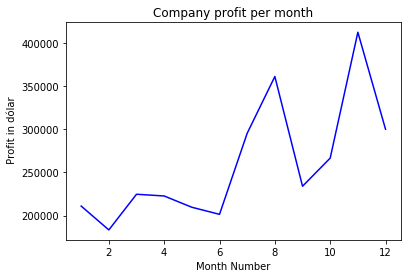

In [58]:
# 1. Um gráfico de linhas com a evolução do lucro ao longo dos meses.
import  matplotlib.pyplot as plt 
x = dff['month_number']
y = dff['total_profit']
plt.plot(x,y, 'b-')

plt.title('Company profit per month')

plt.ylabel(' Profit in dólar')
plt.xlabel('Month Number')

plt.show()

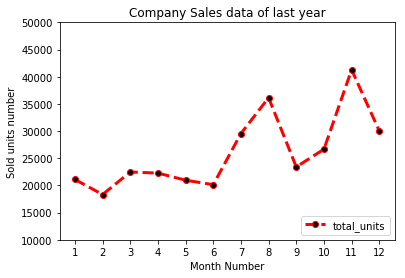

In [59]:
# 2. Numero de unidades vendidas em cada mês
plt.plot(dff['month_number'],dff['total_units'],'-ok' ,
         linestyle='--', markerfacecolor='black',color = 'red' , linewidth=3)

plt.xlabel('Month Number')
plt.xticks(dff['month_number'])

plt.legend(loc = 'lower right')

plt.ylabel('Sold units number')
plt.ylim(10000,50000)

plt.title('Company Sales data of last year')

plt.show()



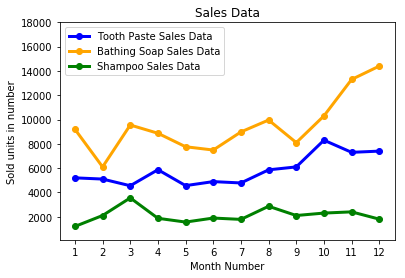

In [61]:
# 3. Evolução das vendas dos produtos. (toothpaste, bathingsoap, shampoo)
plt.plot(dff['month_number'],dff['toothpaste'],'-ok' ,color = 'blue' , linewidth=3,label='Tooth Paste Sales Data')
plt.plot(dff['month_number'],dff['bathingsoap'],'-ok' , color = 'orange' , linewidth=3,label='Bathing Soap Sales Data')
plt.plot(dff['month_number'],dff['shampoo'],'-ok' ,color = 'green' , linewidth=3,label='Shampoo Sales Data')

plt.xlabel('Month Number')
plt.xticks(dff['month_number'])

plt.ylabel('Sold units in number')
plt.ylim(100,18000)

plt.title('Sales Data')

plt.legend(numpoints=1,loc = 'upper left')
plt.show()

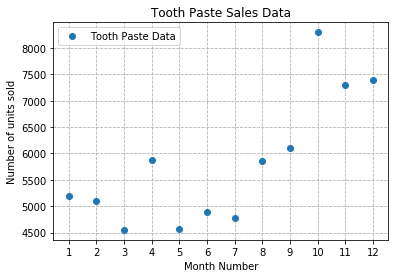

In [62]:
# 4. Um gráfico de dispersão com a evolução das vendas de “toothpaste” 
# ao longo dos meses. 

plt.plot(dff['month_number'],dff['toothpaste'], 'o', label = 'Tooth Paste Data')
plt.grid(linestyle="--")

plt.legend(numpoints=1,loc = 'upper left')
plt.title('Tooth Paste Sales Data')
plt.xticks(dff['month_number'])

plt.ylabel('Number of units sold')
plt.xlabel('Month Number')

plt.show()


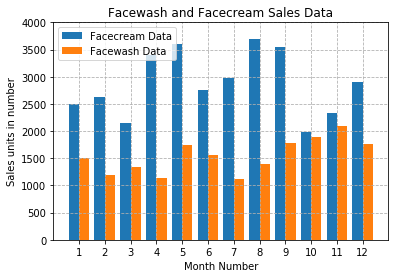

In [63]:
# 5. Gráfico de barras com o número de unidades vendidas por mês para 
# cada produto (face cream e facewash ). 

bar_width=0.4
plt.bar(dff['month_number'],dff['facecream'],  label = 'Facecream Data', width= bar_width)
plt.bar(dff['month_number']+bar_width,dff['facewash'],  label = 'Facewash Data',width= bar_width)

plt.grid(linestyle="--")
plt.legend(loc = 'upper left')

plt.ylim(0,4000)
plt.xticks(dff['month_number']+bar_width/2,dff['month_number'])

plt.title('Facewash and Facecream Sales Data')
plt.ylabel('Sales units in number')
plt.xlabel('Month Number')

plt.show()

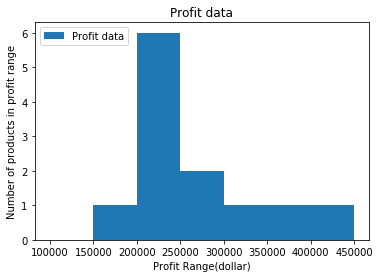

In [64]:
# 6.Histograma com a contagem de produtos em cada gama 
# de valor de lucro . 

import numpy as np
plt.hist(dff['total_profit'], np.arange(100000,460000,50000) , label='Profit data')

plt.xlabel("Profit Range(dollar)")
plt.ylabel("Number of products in profit range")
plt.title("Profit data")
plt.legend(loc = "upper left")
plt.show()

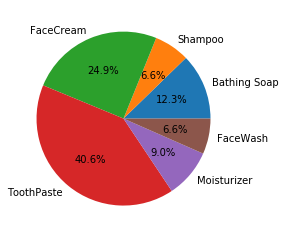

In [65]:
# 7. Calcule o valor acumulado de vendas de cada produto e mostre a 
#   distribuição da sua contribuição num gráfico circular.

lista = []
for i in dff:
    if i == 'month_number' or i == 'total_units' or i == 'total_profit':
        continue
    lista.append(dff[i].sum())

labels = ['Bathing Soap','Shampoo','FaceCream','ToothPaste','Moisturizer','FaceWash']
plt.pie(lista, labels=labels, autopct='%0.1f%%')

plt.show()

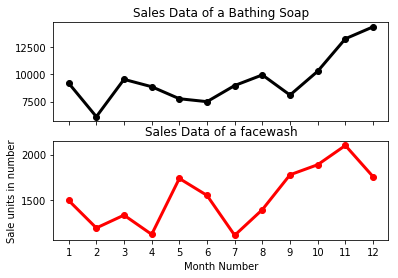

In [66]:
# 8. Exiba a evolução das vendas de “Bathing soap” e “facewash” 
#    ao longo dos meses com recurso a Subplots

plt.subplot(2, 1, 1)
plt.plot(dff['month_number'],dff['bathingsoap'],'-ok' ,color = 'black', linewidth=3)
plt.title('Sales Data of a Bathing Soap')
plt.xticks(dff['month_number'], '')

plt.subplot(2, 1, 2)
plt.plot(dff['month_number'],dff['facewash'],'-ok' ,color = 'red', linewidth=3)

plt.xlabel('Month Number')
plt.title('Sales Data of a facewash')
plt.xticks(dff['month_number'])
plt.ylabel('Sale units in number')

plt.show()


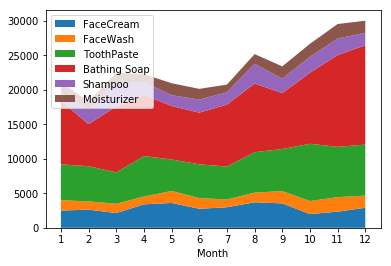

In [78]:
# 9. Mostre o valor de vendas acumulado através de um stack plot.


plt.stackplot(dff['month_number'],dff['facecream'],dff['facewash'],dff['toothpaste'],dff['bathingsoap'],dff['shampoo'],dff['moisturizer'] ,labels=labels)

plt.xticks(dff['month_number'])
plt.xlabel('Month')
plt.legend(loc = 'upper left')

plt.show()

# Analise de outros tipos de ficheiros

In [123]:
import pandas as pd
df_products= pd.read_csv("products.csv", header= 0,delimiter = '\t' ,na_values = ['n.a','?'])
df_categories = pd.read_csv("categories.csv",header= 0,delimiter = ';' ,na_values = ['n.a','?'])
df_prod_cat = df_categories.merge(df_products)


In [124]:
# Troca de tipo da coluna Price para float
df_prod_cat['Price'] = df_prod_cat['Price'].apply(lambda x: float(x.replace(".","").replace(",",".")))

### Analise dos ficheiros Products e categories

In [125]:
df_prod_cat.head(5)

,CategoryID,CategoryName,ProductID,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,Bio
0,1,Confections,15,"Spoon - Soup, Plastic",32.4420,Low,2017-03-03 09:47:09.310,Weak,True,No
1,1,Confections,27,Chocolate - Compound Coating,17.1724,Medium,2017-10-29 17:27:27.280,NaN,NaN,No
2,1,Confections,42,Bread - Raisin Walnut Oval,81.0488,High,2018-04-01 08:39:17.290,Weak,False,No
3,1,Confections,52,"Turnip - White, Organic",55.6059,Low,2017-06-27 06:39:03.810,Durable,False,No
4,1,Confections,62,Pears - Bosc,19.5217,Medium,2017-09-09 10:50:41.830,NaN,NaN,No


In [126]:
df_prod_cat.tail(5)

,CategoryID,CategoryName,ProductID,ProductName,Price,Class,ModifyDate,Resistant,IsAllergic,Bio
447,11,Produce,398,Wine - Wyndham Estate Bin 777,42.3632,High,2017-11-05 15:15:31.080,Weak,True,No
448,11,Produce,405,Pastry - Raisin Muffin - Mini,0.4278,Medium,2017-11-25 08:12:00.480,Durable,True,No
449,11,Produce,409,Skirt - 29 Foot,23.5220,Medium,2018-04-08 15:00:39.310,Durable,NaN,No
450,11,Produce,439,"Beef - Chuck, Boneless",56.0919,Medium,2017-04-09 14:18:50.960,NaN,False,No
451,11,Produce,452,Napkin White - Starched,28.5653,Low,2017-01-06 14:39:42.890,Durable,NaN,No


In [127]:
# Qual o tamanho do dataframe
df_prod_cat.shape

(452, 10)

In [128]:
# Qual é o produto mais caro biologico e qual o mais caro que nao é biologico.
df_prod_cat.groupby('Bio')['Price'].max()

Bio
No     99.8755
Yes    96.0823
Name: Price, dtype: float64

In [129]:
# Qual é o produto mais caro que é alergico e qual o mais caro que nao é alergico.
df_prod_cat.groupby('IsAllergic')['Price'].max()

IsAllergic
False    99.8755
True     98.8263
Name: Price, dtype: float64

In [130]:
# Qual as suas carateristicas do produto mais caro 
df_prod_cat[['CategoryName','ProductName','Price','Resistant','IsAllergic','Bio']][df_prod_cat['Price']==df_prod_cat['Price'].max()]

,CategoryName,ProductName,Price,Resistant,IsAllergic,Bio
103,Cereals,Shrimp - 31/40,99.8755,Weak,False,No


In [131]:
# Qual as suas carateristicas do produto mais barato 
df_prod_cat[['CategoryName','ProductName','Price','Resistant','IsAllergic','Bio']][df_prod_cat['Price']==df_prod_cat['Price'].min()]

,CategoryName,ProductName,Price,Resistant,IsAllergic,Bio
225,Seafood,Bread Crumbs - Japanese Style,0.0449,NaN,False,No


In [132]:
# Quantos produtos sao biologicos
Bio = df_prod_cat.groupby(['Bio'])
SaoBio = Bio.get_group('Yes')
print("Existem",SaoBio.count()['Bio'],"produtos biologicos")

Existem 67 produtos biologicos


In [134]:
#Quantos produtos biologicos tem o preco maior que 50 
print('Existem',len(SaoBio[SaoBio['Price']> 50]),'produtos biologicos com o preço maior do que 50.')

Existem 29 produtos biologicos com o preço maior do que 50.


In [193]:
# Soma dos precos por categoria do produto
df_prod_cat.groupby(['CategoryName']).agg({'Price':sum})

,Price
CategoryName,
Beverages,1939.6600
Cereals,2268.7375
Confections,2955.4461
Dairy,1874.4891
Grain,1719.3105
Meat,2613.7326
Poultry,2324.6615
Produce,1952.0323
Seafood,1751.9996


### Analise dos ficheiros customers e cities

In [183]:
df_customers= pd.read_csv("customers.csv", header= 0,delimiter = ';' ,na_values = ['n.a','?'])
df_cities = pd.read_csv("cities.csv",header= 0,delimiter = '\t' ,na_values = ['n.a','?'])

df_customers_cities = df_customers.merge(df_cities)

In [184]:
df_customers_cities.head(5)

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32
1,198,Todd,M,Franklin,79,169 Clarendon Way,Oklahoma,40472,32
2,224,Hilary,X,Fitzgerald,79,150 New Avenue,Oklahoma,40472,32
3,228,Joy,O,Mcfarland,79,370 Cowley Avenue,Oklahoma,40472,32
4,250,Robin,Z,Kane,79,14 Clarendon Drive,Oklahoma,40472,32


In [10]:
# criar nova coluna com o primeiro e ultimo nome
df_customers_cities['NameCustomer'] =  df_customers_cities['FirstName'] +' '+ df_customers_cities['LastName']
df_customers_cities.head()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,CityName,Zipcode,CountryID,NameCustomer
0,1,Stefanie,Y,Frye,79,97 Oak Avenue,Oklahoma,40472,32,Stefanie Frye
1,198,Todd,M,Franklin,79,169 Clarendon Way,Oklahoma,40472,32,Todd Franklin
2,224,Hilary,X,Fitzgerald,79,150 New Avenue,Oklahoma,40472,32,Hilary Fitzgerald
3,228,Joy,O,Mcfarland,79,370 Cowley Avenue,Oklahoma,40472,32,Joy Mcfarland
4,250,Robin,Z,Kane,79,14 Clarendon Drive,Oklahoma,40472,32,Robin Kane


In [17]:
# tamanho do dataset
df_customers_cities.shape

(98759, 10)

In [20]:
# Quaintas as cidades existentem 
print('Existem',len(df_customers_cities['CityName'].unique()),'cidades')

Existem 96 cidades


In [21]:
# Quais as cidades existentes 
df_customers_cities['CityName'].unique()

array(['Oklahoma', 'Pittsburgh', 'Houston', 'Cleveland', 'Buffalo',
       'Austin', 'Anchorage', 'Memphis', 'New York', 'Honolulu',
       'Anaheim', 'Nashville', 'Fresno', 'Las Vegas', 'Birmingham',
       'Portland', 'Aurora', 'Fort Wayne', 'New Orleans', 'Baltimore',
       'Denver', 'Atlanta', 'Toledo', 'Detroit', 'Norfolk', 'Tulsa',
       'Philadelphia', 'Raleigh', 'Montgomery', 'Los Angeles', 'Fremont',
       'Grand Rapids', 'Spokane', 'Chicago', 'Baton Rouge', 'Stockton',
       'Rochester', 'Wichita', 'Cincinnati', 'Madison', 'Newark',
       'Garland', 'Jackson', 'Akron', 'Seattle', 'Shreveport',
       'Louisville', 'St. Louis', 'Phoenix', 'Washington', 'Charlotte',
       'Little Rock', 'Glendale', 'Albuquerque', 'Tucson', 'Bakersfield',
       'Jacksonville', 'San Antonio', 'Lubbock', 'Miami', 'Indianapolis',
       'Columbus', 'Kansas', 'Milwaukee', 'Tacoma', 'Virginia Beach',
       'Mobile', 'Dayton', 'Corpus Christi', 'Arlington', 'Yonkers',
       'San Jose', 'Santa

In [80]:
# Qual o primeiro cosumidor de cada cidade
city = df_customers_cities.groupby(['CityName'])
city.first()

,CustomerID,FirstName,MiddleInitial,LastName,CityID,Address,Zipcode,CountryID,NameCustomer
CityName,,,,,,,,,
Akron,58,Meredith,Q,Meza,13,85 White Cowley Boulevard,83448,32,Meredith Meza
Albuquerque,74,Dianna,W,Mc Cormick,54,620 Green Hague Road,55358,32,Dianna Mc Cormick
Anaheim,11,Jenifer,R,Winters,23,30 White Oak Way,21500,32,Jenifer Winters
Anchorage,7,Myra,K,Jefferson,68,26 Green First Parkway,29493,32,Myra Jefferson
Arlington,107,Marisa,P,Bennett,8,66 West First St.,12654,32,Marisa Bennett
Atlanta,25,Peggy,R,Sandoval,9,97 Second Way,66212,32,Peggy Sandoval
Aurora,20,Theresa,E,Berg,83,41 Hague Road,40050,32,Theresa Berg
Austin,6,Dennis,H,Zuniga,6,20 West Old Road,781,32,Dennis Zuniga
Bakersfield,77,Clifton,A,Bradshaw,41,21 First Avenue,13915,32,Clifton Bradshaw


 # Visualização de dados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CFA428898>],
      dtype=object)

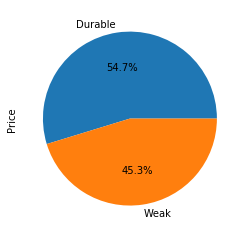

In [185]:
# Quantidade, em percentagem de produtos, com a respetiva resistencia

r = pd.DataFrame(df_prod_cat.groupby('Resistant')['Price'].sum())
r.plot.pie(subplots= True, legend= False, autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CF784D208>],
      dtype=object)

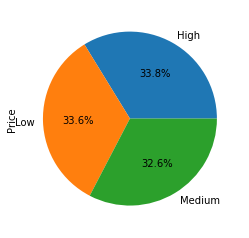

In [171]:
# Percentagem de produtos com os respetivas Classes

Class = pd.DataFrame(df_prod_cat.groupby('Class')['Price'].sum())
Class.plot.pie(subplots= True, legend= False, autopct='%1.1f%%')

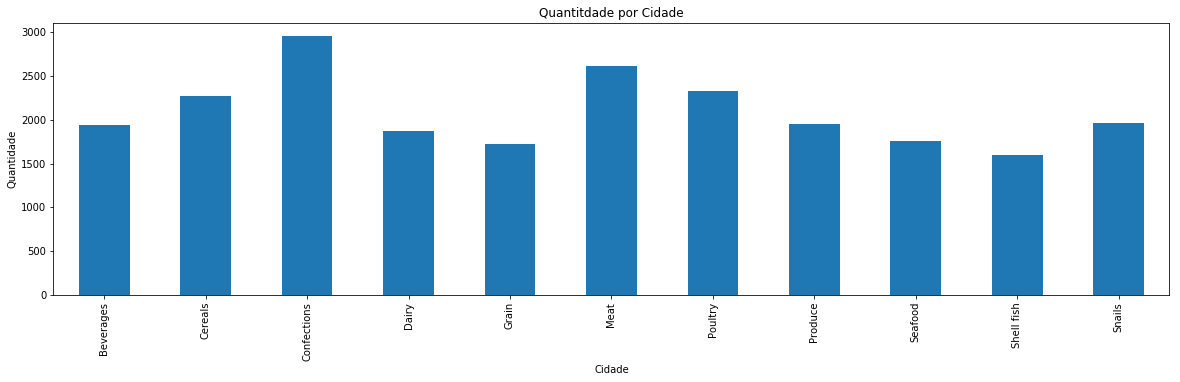

In [186]:
c = pd.DataFrame(df_prod_cat.groupby('CategoryName')['Price'].sum())
fig,ax = plt.subplots(figsize=(20,5))
c.plot.bar(ax=ax)
plt.ylabel('Quantidade')
plt.xlabel("Cidade")
plt.title('Quantitdade por Cidade')
plt.legend().set_visible(False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CF78FD748>],
      dtype=object)

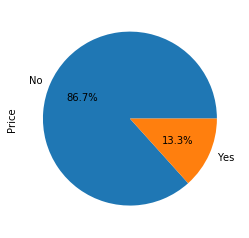

In [170]:
# Quantidade em percentagem de produtos biologicos

g = pd.DataFrame(df_prod_cat.groupby('Bio')['Price'].sum())
g.plot.pie(subplots= True, legend= False, autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CF60D0E10>],
      dtype=object)

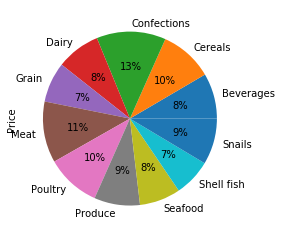

In [141]:
c = pd.DataFrame(df_prod_cat.groupby('CategoryName')['Price'].sum())
c.plot.pie(subplots= True, legend= False, autopct='%1.0f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CF78E9748>],
      dtype=object)

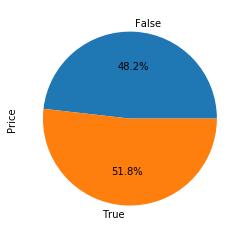

In [169]:
# Quantidade em percentagem de produtos alergicos

g = pd.DataFrame(df_prod_cat.groupby('IsAllergic')['Price'].sum())
g.plot.pie(subplots= True, legend= False, autopct='%1.1f%%')